# Advanced Image Processing Assignment-2
Team:- Dhyanil Mehta (202011032), Kishan Vaishnani (202011004)

## Importing necessary libraries

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 1. Consider Fig.1(mask_orig.png) and remove the larger object from the image.
_[Hint: Create a mask and apply arithmetic operation]_

(384, 384, 3)
(384, 384)


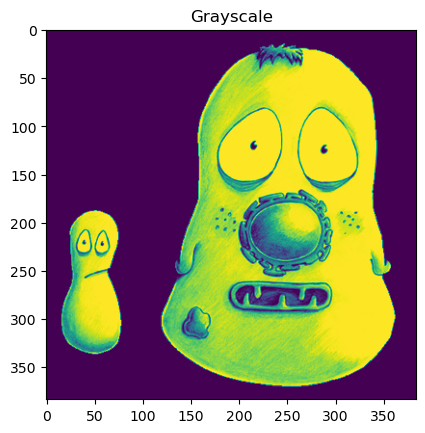

In [0]:
# First display mask_orig.png by converting it to grayscale.
mask_orig = cv2.imread('mask_orig.png')
mask_orig_gray = cv2.cvtColor(mask_orig, cv2.COLOR_BGR2GRAY)

plt.imshow(mask_orig)
plt.title("Original")
plt.figure()
plt.imshow(mask_orig_gray)
plt.title("Grayscale")
plt.show()

print(mask_orig.shape)
print(mask_orig_gray.shape)

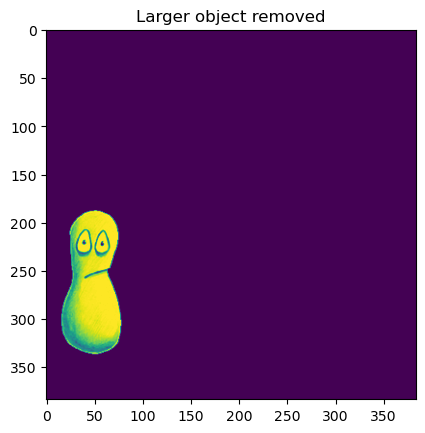

In [0]:
# Creating a mask and removing the larger object. Implement an algorithm to find out the numberplate of Fig.3(a) within the image (Fig. 3(b)).
# [Hint: Use the image matching algorithm and find out the normalized cross-correlation for each
# pixel].ject in the image
height, width = mask_orig_gray.shape
mask = np.ones((height, width), np.uint8)
mask[15:375, 115:370] = 0
plt.imshow(mask)
plt.title("Mask")
# cv2.imwrite("mask.png", mask)

masked_mask_orig = cv2.copyTo(mask_orig_gray, mask)
plt.figure()
plt.imshow(masked_mask_orig)
plt.title("Larger object removed")
cv2.imwrite("mask_applied.png", masked_mask_orig)

35
58112
1
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34]


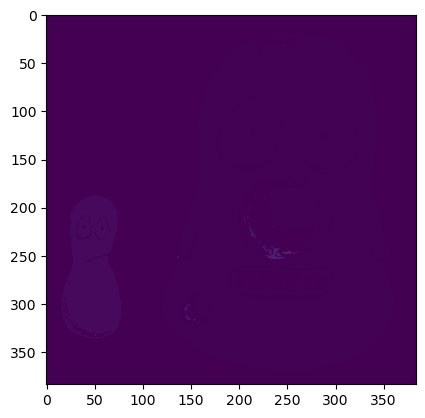

In [0]:
# Read Input Image
img = cv2.imread("mask_orig.png", cv2.IMREAD_GRAYSCALE)

_, BImg = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

n_labels, labels,_,_ = cv2.connectedComponentsWithStats(BImg, connectivity=8)

unique, count = np.unique(labels, return_counts=True)
print(len(unique))
print(sorted(count)[-2])
s_largest_index = np.where(count == sorted(count)[-2])[0][0]
print(s_largest_index)
print(unique)
label=unique[s_largest_index]

mask=np.copy(labels)
mask[label] = 255
plt.imshow(mask)

## 2. Consider Fig.2, and find out whether a motion has occurred between (a) and (b).
_[Hint: Find out the percentage in change in pixels.]_

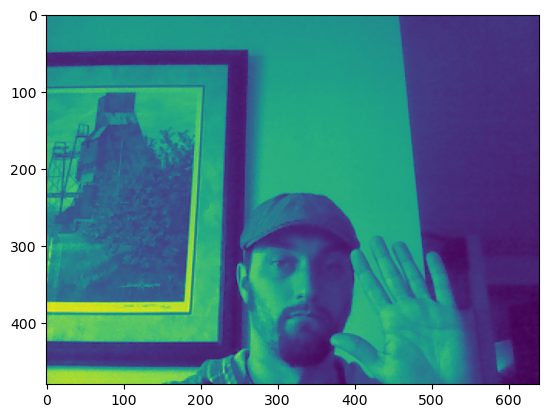

In [0]:
# First display both the images in grayscale
person_hand1_img = cv2.imread("image-math-person1.png", 0)
person_hand2_img = cv2.imread("image-math-person2.png", 0)
plt.figure()
plt.imshow(person_hand1_img)
plt.figure()
plt.imshow(person_hand2_img)

Change detected between image-math-person1.png and image-math-person2.png
Percentage change: 4.11%


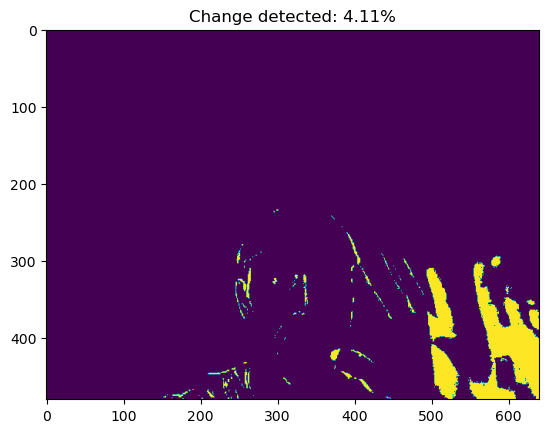

In [0]:
# Calculating percentage change in pixels and detecting if there was a motion.
DELTA_THRESH = 65 # Threshold value for pixel change (Range: 0-255)

# --- Take the absolute difference of the images ---
diff_person_hand = cv2.absdiff(person_hand1_img, person_hand2_img)
plt.imshow(diff_person_hand)
plt.title("Pixel-wise subtraction of two images")
cv2.imwrite("pixel-wise-sub.png", diff_person_hand)

# --- Convert the result to integer type ---
diff_person_hand = diff_person_hand.astype(np.uint8)

# --- Find percentage difference based on number of pixels that are not zero ---
thresh = cv2.threshold(diff_person_hand, DELTA_THRESH, 255, cv2.THRESH_BINARY)

change_percentage = (np.count_nonzero(thresh[1]) * 100) / diff_person_hand.size
if change_percentage > 1:
    print("Change detected between image-math-person1.png and image-math-person2.png")
print(f"Percentage change: {change_percentage:0.3}%")
plt.figure()
plt.imshow(thresh[1])
plt.title(f"Change detected: {change_percentage:0.3}%")
cv2.imwrite("change-detected.png", thresh[1])

## 3. Implement an algorithm to find out the numberplate of Fig.3(a) within the image (Fig. 3(b)).
_[Hint: Use the image matching algorithm and find out the normalized cross-correlation for each
pixel]._

(array([301]), array([305]))


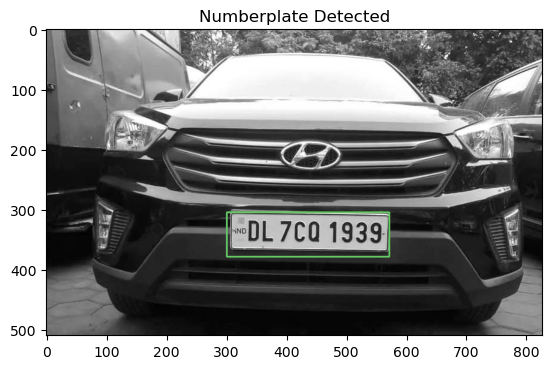

In [0]:
## Template Matching

# Read the car(main) image
rgb_img = cv2.imread('number_plate.jpg')

# Convert it to grayscale
gray_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2GRAY)

# Read the input image(template) as a grayscale image
plate = cv2.imread('plate.jpg',0)

# Store width and height of template in w and h
# This we need to make boumnding box on detected area
h, w = plate.shape

# Perform match operations using normalized correlation coefficient 
matched = cv2.matchTemplate(gray_img,plate,cv2.TM_CCOEFF_NORMED)

# Specify a threshold to make 
threshold = 0.95

# Store the coordinates of matched area in a numpy array
area = np.where( matched >= threshold)
print(area)
# Draw a rectangle around the matched area
for pt in zip(*area):
    cv2.rectangle(rgb_img, pt, (pt[0] + w, pt[1] + h), (100,200,100), 2)

# Show the final image with the matched area
plt.imshow(rgb_img)
plt.title('Numberplate Detected')
plt.show()
cv2.imwrite("plate-detected.png", rgb_img)